In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
basedir = '/content/drive/MyDrive/Dissertation/Datasets'

In [4]:
def load_csv(basedir):
  return pd.read_csv(os.path.join(basedir, 'Osmann et al. (2019).csv'))

In [5]:
df = load_csv('/content/drive/MyDrive/Dissertation/Datasets')

In [6]:
df

year  MAS [Standard variance]  lower bound 95%  upper bound 95%
0    2013                    -1.77            -3.42            -0.47
1    2012                    -1.21            -2.81            -0.36
2    2011                    -1.41            -3.25            -0.45
3    2010                    -1.50            -2.08            -0.37
4    2009                    -1.10            -2.10            -0.59
..    ...                      ...              ...              ...
242  1771                     0.75             0.03             1.30
243  1770                     0.96             0.18             1.65
244  1769                     0.99            -0.11             1.94
245  1768                     0.56            -0.69             1.64
246  1767                     0.49            -0.69             1.54

[247 rows x 4 columns]

In [7]:
df.shape

(247, 4)

In [8]:
df.head()

year  MAS [Standard variance]  lower bound 95%  upper bound 95%
0  2013                    -1.77            -3.42            -0.47
1  2012                    -1.21            -2.81            -0.36
2  2011                    -1.41            -3.25            -0.45
3  2010                    -1.50            -2.08            -0.37
4  2009                    -1.10            -2.10            -0.59

In [9]:
df.tail()

year  MAS [Standard variance]  lower bound 95%  upper bound 95%
242  1771                     0.75             0.03             1.30
243  1770                     0.96             0.18             1.65
244  1769                     0.99            -0.11             1.94
245  1768                     0.56            -0.69             1.64
246  1767                     0.49            -0.69             1.54

In [10]:
pip install plotnine

In [11]:
from pandas.api.types import CategoricalDtype
from plotnine import *
from plotnine.data import mpg
%matplotlib inline

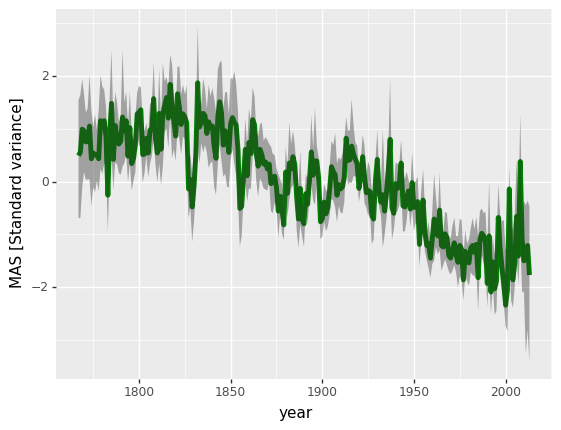

<ggplot: (8754304058841)>

In [12]:
(
    ggplot(df)  
    + aes(x="year", y="MAS [Standard variance]")  
    + geom_line(colour = 'green', size = 2) 
    + geom_ribbon(aes(ymax = "lower bound 95%",ymin = "upper bound 95%"),alpha = 0.4)
)

In [13]:
new = df.dropna()

In [14]:
o = len(df.axes[0])
n = len(new.axes[0])
print(f"Deleted Rows= {o-n}")

Deleted Rows= 0


In [15]:
column = []
for col in new.columns:
    column.append(col)

In [16]:
for i in column:
  mean = np.mean(df[i])
  print(f"Mean of {i} = {mean}")

Mean of year = 1890.0
Mean of MAS [Standard variance] = 0.001943319838056502
Mean of lower bound 95% = -0.5708097165991896
Mean of upper bound 95% = 0.5878542510121456


In [17]:
for i in column:
  median = np.median(df[i])
  print(f"Median of {i} = {median}")

Median of year = 1890.0
Median of MAS [Standard variance] = 0.1
Median of lower bound 95% = -0.39
Median of upper bound 95% = 0.65


In [18]:
from scipy import stats
for i in column:
  mode = stats.mode(df[i])
  print(f"Mode of {i} = {mode[0][0]}")

Mode of year = 1767
Mode of MAS [Standard variance] = -1.21
Mode of lower bound 95% = 0.35
Mode of upper bound 95% = -1.04


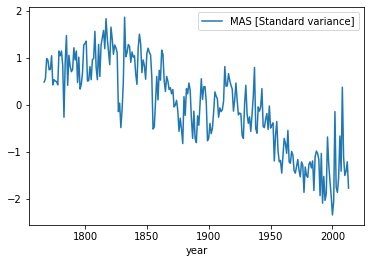

In [19]:
d = 0
for i in column:
  if i != 'year':
    fig = df.plot(x="year", y=[i])
    d = d + 1

In [20]:
!sudo apt-get install jags
!pip install pyjags

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  jags
0 upgraded, 1 newly installed, 0 to remove and 37 not upgraded.
Need to get 1,562 kB of archives.
After this operation, 3,522 kB of additional disk space will be used.
Get:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ jags 4.3.0-3bionic0 [1,562 kB]
Fetched 1,562 kB in 0s (8,377 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package jags.
(Reading database ... 155222 files and directories curr

In [21]:
import pyjags

In [22]:
pyjags

<module 'pyjags' from '/usr/local/lib/python3.7/dist-packages/pyjags/__init__.py'>

In [23]:
plt.style.use('ggplot')

In [24]:
N = len('year')
alpha = len('MAS [Standard variance]')
beta = len('lower bound 95%')
sigma = len('upper bound 95%')

In [25]:
# Generate x uniformly
x = np.random.uniform(0, 100, size=N)
# Generate y as alpha + beta * x + Gaussian error term
y = np.random.normal(alpha + x*beta, sigma, size=N)

In [26]:
# JAGS model code
code = '''
model {
    for (i in 1:N) {
        y[i] ~ dnorm(alpha + beta * x[i], tau)
    }
    alpha ~ dnorm(0.0, 1.0E-4)
    beta ~ dnorm(0.0, 1.0E-4)
    sigma <- 1.0/sqrt(tau)
    tau ~ dgamma(1.0E-3, 1.0E-3)
}
'''

In [27]:
# Load additional JAGS module
pyjags.load_module('glm')

In [28]:
# Initialize model with 4 chains and run 1000 adaptation steps in each chain.
# We treat alpha, beta and sigma as parameters we would like to infer, based
# on observed values of x and y.
model = pyjags.Model(code, data=dict(x=x, y=y, N=N), chains=4, adapt=1000)
 
# 500 warmup / burn-in iterations, not used for inference.
model.sample(500, vars=[])
 
# Run model for 1000 steps, monitoring alpha, beta and sigma variables.
# Returns a dictionary with numpy array for each monitored variable.
# Shapes of returned arrays are (... shape of variable ..., iterations, chains).
# In our example it would be simply (1, 1000, 4).
samples = model.sample(1000, vars=['alpha', 'beta', 'sigma'])

sampling: iterations 2000 of 2000, elapsed 0:00:00, remaining 0:00:00
sampling: iterations 4000 of 4000, elapsed 0:00:00, remaining 0:00:00


In [29]:
# Use pandas three dimensional Panel to represent the trace:
#x = pd.DataFrame({k: v.squeeze(0) for k, v in samples.items()})
trace = pd.Panel({k: v.squeeze(0) for k, v in samples.items()})
#trace.axes[0].name = 'Variable'
##trace.axes[1].name = 'Iteration'
#trace.axes[2].name = 'Chain'
return trace

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  This is separate from the ipykernel package so we can avoid doing imports until


TypeError: ignored

In [30]:
x = {k: v.squeeze(0) for k, v in samples.items()}

In [31]:
x

{'alpha': array([[ 83.03027739,  29.9669963 , 124.14382023,  25.85985603],
        [103.28537903,  45.47252827, 123.35490689,  27.90144561],
        [128.62113679,  53.27432565,  88.91938556,  30.37640928],
        ...,
        [ 36.6327772 ,  19.23586587,  -1.9710588 ,  -3.18600284],
        [ 75.85110517,  47.7975519 ,  13.83611724,   9.90628008],
        [ 90.25334328,   5.89667418,  35.51328632,   5.30071477]]),
 'beta': array([[14.05123598, 14.84626367, 13.64047126, 15.01234027],
        [13.92621744, 14.72364575, 13.83988312, 14.96029467],
        [13.7206672 , 14.51470478, 14.37774097, 14.93461692],
        ...,
        [14.69678795, 14.68219462, 15.2031013 , 15.30646436],
        [14.21506528, 15.01013504, 14.97074799, 15.17766929],
        [14.23021813, 15.47333002, 14.81502448, 15.25767793]]),
 'sigma': array([[33.72958779, 20.45677174, 34.6382232 , 14.94849005],
        [24.99005403, 11.02804386, 21.56297876,  9.79109582],
        [14.94376586, 46.85344852, 45.55101746, 37.0

In [32]:
# Point estimates:
print(trace.to_frame().mean())
 
# Possible output:
# Variable
# alpha 71.693096
# beta 19.860774
# sigma 49.790683

NameError: ignored

In [33]:
# Bayesian equal-tailed 95% credible intervals:
print(trace.to_frame().quantile([0.05, 0.95]))
 
# Possible output:
# Variable alpha beta sigma
# 0.05 61.98259 19.694937 46.472748
# 0.95 81.27412 20.025410 53.284573

NameError: ignored

In [34]:
def plot(trace, var):
    fig, axes = plt.subplots(1, 3, figsize=(9, 3))
    fig.suptitle(var, fontsize='xx-large')
 
    # Marginal posterior density estimate:
    trace[var].plot.density(ax=axes[0])
    axes[0].set_xlabel('Parameter value')
    axes[0].locator_params(tight=True)
     # Autocorrelation for each chain:
    axes[1].set_xlim(0, 100)
    for chain in trace[var].columns:
        autocorrelation_plot(trace[var,:,chain], axes[1], label=chain)
 
    # Trace plot:
    axes[2].set_ylabel('Parameter value')
    trace[var].plot(ax=axes[2])
 
    # Save figure
    plt.tight_layout()
    fig.savefig('{}.png'.format(var))
 
# Display diagnostic plots
for var in trace:
    plot(trace, var)
 
# Scatter matrix plot:
scatter_matrix(trace.to_frame(), diagonal='density')
plt.savefig('scatter_matrix.png')

NameError: ignored